例子：比如说我们现在有个项目，该项目共有三个WBS要素分别是设计、建造和测试，为了简单起见我们假设这三个WBS要素的预估的工期概率分布都呈标准正态分布，而且三者之间都是完成到开始的逻辑关系，这样整个项目工期就是这三个WBS要素工期之和。
使用蒙特卡洛模拟方法，首先构建概率模型(这个应该是解决问题的关键)，这个例子中假设了设计、建造和测试三个要素呈正态分布；然后根据正态分布对这三个要素进行采样；估计量就是工期时间，工期时间是三个要素之和，根据采样结果计算工期的模拟值，并计算工期模拟值的出现频率(概率)，最后根据出现频率计算累积概率。

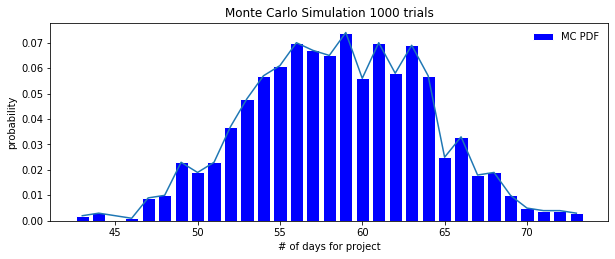

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
# 参数
mu = [14, 23, 22]
sigma = [2, 3, 4]
tips = ['design', 'build', 'test']
 
# figureIndex = 0
# fig = plt.figure(figureIndex, figsize=(10,8))
# # 显示分布图
# color = ['r', 'g', 'b']
# ax = fig.add_subplot(111)
#ax = plt.subplot(1,1,1)
 
for i in range(3):
    x = np.linspace(mu[i] - 3 * sigma[i], mu[i] + 3 * sigma[i], 100)
    y_sig = np.exp(-(x - mu[i]) ** 2 / (2 * sigma[i] ** 2)) / (math.sqrt(2 * math.pi) * sigma[i])
    ax.plot(x, y_sig, color[i]+'-', linewidth=2, alpha=0.6, label=tips[i])
    
# ax.legend(loc='best', frameon=False)
# ax.set_xlabel('# of days')
# ax.set_ylabel('probability')
# plt.grid(True)
 
# 蒙特卡洛采样
# 三个WBS要素
size = 1000   # 1000 trials
samples = [np.random.normal(mu[i], sigma[i], size) for i in range(3)]
# 计算工期
data = np.zeros(len(samples[1]))
for i in range(len(samples[1])):
    for j in range(3):
        data[i] += samples[j][i]
    data[i] = int(data[i])
    
# 统计一个列表中每个元素出现的次数

def count(lis):
    lis=np.array(lis)
    key=np.unique(lis)
    x = []
    y = []
    for k in key:
        mask =(lis == k)
        list_new=lis[mask]
        v=list_new.size
        x.append(k)
        y.append(v)
    return x,y

 
# 计算工期出现频率与累积概率
a,b = count(data)
pdf = [x/size for x in b]
 
cdf = np.zeros(len(a))
for i in range(len(a)):
    if i > 0:
        cdf[i] += cdf[i-1]
    cdf[i] += b[i]
 
cdf = cdf/size
 
figureIndex += 1
fig = plt.figure(figureIndex, figsize=(10,8))
ax = fig.add_subplot(211)
ax.bar(a, height=pdf, color = 'blue',edgecolor = 'white', label='MC PDF')
ax.plot(a, pdf)
ax.legend(loc='best', frameon=False)
ax.set_xlabel('# of days for project')
ax.set_ylabel('probability')
ax.set_title('Monte Carlo Simulation 1000 trials')
 
# ax = fig.add_subplot(212)
# ax.plot(a, cdf, 'r-', marker='o', mfc='b', ms=4, lw=2, alpha=0.6, label='MC CDF')
# ax.legend(loc='best', frameon=False)
# ax.set_xlabel('# of days for project')
# ax.set_ylabel('probability')
# ax.grid(True)
 
plt.show()
